# 최종모의고사

## 1. 구매 내역 데이터

### 1-1. 해당 데이터를 군집화한 후 군집별로 요일 및 시간에 따른 구매금액을 히트맵으로 표현하고 해석하시오.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("final_1.csv")

In [3]:
data.head()

,datetime,custid,store,product,brand,corner,import,amount,installment,gender,age,marriage,residence,job
0,2000-05-01 10:43,18313,신촌점,4104840008000,샤넬,화장품,1,113000,3,여,31,미혼,Seongdong-gu,금융기관
1,2000-05-01 11:00,18313,신촌점,2700000000000,식품,일반식품,0,91950,3,여,31,미혼,Seongdong-gu,금융기관
2,2000-05-01 11:33,27222,신촌점,4545370944500,까사미아,가구,0,598000,3,여,37,기혼,Mapo-gu,개인사업
3,2000-05-01 11:43,27222,신촌점,4500860043900,대아통상,기타,0,20100,1,여,37,기혼,Mapo-gu,개인사업
4,2000-05-01 11:53,27222,신촌점,4538130048700,토이플러스,문화완구,0,24000,1,여,37,기혼,Mapo-gu,개인사업


군집분석은 크게 계층적 군집분석과 비계층적 군집분석으로 구분할 수 있다. 비계층적 군집분석은 전통적인 군집분석으로 군집의 개수를 나중에 선정한다. 반면에 비계층적 군집분석은 군집의 모양도 계층적이지 않지만 군집의 개수를 사전에 선정하고 모형을 개발한다.

계층적 군집에는 크게 합병형과 분리형이 있는데 합병형에는 단일연결법, 평균연결법, 와드연결법, 최장연결법, 중심연결법이 있다. 분리형에는 다이아나 방법이 있다. 분할적 군집에는 프로토타입, 분포기반, 밀도기반 방식이 있다. 프로토타입의 경우는 k-중심 군집과 퍼지군집이 있다. 분포기반에는 혼합분포군집이 있고 밀도기반에는 중심밀도군집과 밀도기반이 있다.

군집분석은 거리 함수를 이용하여 군집을 할당하는데 연속형 변수의 거리 함수로는 유클리디안 거리, 표준화 거리, 마할라노비스 거리 등이 있으며 범주형 변수에는 자카드 거리, 코사인 거리 등이 있다. 

우선 데이터의 크기를 고려하여 알고리즘이 단순하고 빠른 장점이 있는 k-평균 군집분석을 수행한다.

In [4]:
from sklearn.cluster import KMeans

군집화에 앞서 데이터를 적절한 형태로 변환한다.

In [5]:
data['marriage'] = [1 if x == '기혼' else 0 for x in data['marriage']]

In [6]:
data['gender'] = [1 if x == '여' else 0 for x in data['marriage']]

In [7]:
data['datetime'] = pd.to_datetime(data['datetime'])

In [8]:
data['month'] = data['datetime'].dt.month

In [9]:
data['hour'] = data['datetime'].dt.hour

In [10]:
data['day'] = data['datetime'].dt.day_name()

In [11]:
id_m_hour = data.groupby('custid').hour.mean().reset_index(name = '평균방문시간대')
id_nuni_corner = data.groupby('custid').corner.nunique().reset_index(name = '구매코너종류수')
id_nuni_brand = data.groupby('custid').brand.nunique().reset_index(name = '구매브랜드종류수')
id_nuni_day = data.groupby('custid').day.nunique().reset_index(name = '구매요일수')
id_m_amount = data.groupby('custid').amount.mean().reset_index(name = '평균구매액')
id_m_ins = data.groupby('custid').installment.mean().reset_index(name = '평균할부개월수')
id_nuni_store = data.groupby('custid').store.nunique().reset_index(name = '구매지점수')
id_tot_buy = data.groupby('custid').store.size().reset_index(name = '총방문수')

In [12]:
import_ratio = pd.crosstab(data.custid, data['import'])
import_ratio = (import_ratio[1] / import_ratio.sum(axis = 1)).reset_index(name = '수입상품구매비율')

In [13]:
id_g_a = data[['custid', 'gender', 'age']].drop_duplicates().sort_values(by = 'custid')

In [14]:
id_df = pd.DataFrame(sorted(data.custid.unique()), columns = ['custid'])

In [15]:
id_df = pd.merge(id_df, id_m_hour, how = 'left')
id_df = pd.merge(id_df, id_nuni_corner, how = 'left')
id_df = pd.merge(id_df, id_nuni_brand, how = 'left')
id_df = pd.merge(id_df, id_nuni_day, how = 'left')
id_df = pd.merge(id_df, id_m_amount, how = 'left')
id_df = pd.merge(id_df, id_m_ins, how = 'left')
id_df = pd.merge(id_df, id_nuni_store, how = 'left')
id_df = pd.merge(id_df, id_tot_buy, how = 'left')
id_df = pd.merge(id_df, import_ratio, how = 'left')
id_df = pd.merge(id_df, id_g_a, how = 'left')

In [16]:
id_df

,custid,평균방문시간대,구매코너종류수,구매브랜드종류수,구매요일수,평균구매액,평균할부개월수,구매지점수,총방문수,수입상품구매비율,gender,age
0,10070,15.100000,9,13,7,71540.000000,1.500000,3,20,0.100000,0,28
1,10139,15.937500,8,13,4,212875.000000,2.125000,1,16,0.000000,0,28
2,10208,15.872832,20,81,7,69492.826590,1.416185,1,173,0.028902,0,28
3,10275,16.857143,4,7,5,124871.428571,1.857143,3,7,0.428571,0,28
4,10350,16.823529,9,14,5,76526.176471,2.058824,2,17,0.117647,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...
495,48997,13.175439,6,9,7,23833.251462,1.000000,1,171,0.011696,0,66
496,49112,14.583333,7,10,6,89533.333333,2.916667,1,12,0.000000,0,65
497,49232,14.066667,9,13,4,183570.266667,2.200000,1,15,0.133333,0,67
498,49351,16.444444,6,8,4,114922.222222,1.888889,1,9,0.333333,0,68


In [17]:
cls_n = range(2, 11)
inertia_list = []
SS_list = []

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
scaled_df = scaler.fit_transform(id_df.iloc[:, 1:])

In [21]:
for k in cls_n :
    model = KMeans(n_clusters = k, random_state = 326).fit(scaled_df)
    inertia_list.append(model.inertia_)
    id_df['cls'] = model.labels_

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

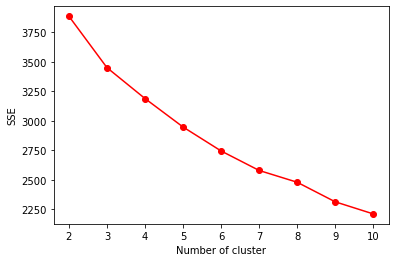

In [23]:
plt.plot(cls_n, inertia_list, marker = 'o', color = 'r')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

군집화 결과가 마땅치 않기 때문에 혼합 분포 군집을 사용한다. 혼합 분포 군집은 추정된 k개의 모형 중 어느 모형으로부터 나왔을 확률이 높은지에 따라 군집의 분류가 이루어진다.

In [24]:
from sklearn.mixture import GaussianMixture

In [25]:
cls_n = range(2, 6)
aic_list = []

In [26]:
for k in cls_n :
    gmm = GaussianMixture(n_components = k, random_state = 326).fit(scaled_df)
    aic_list.append(gmm.aic(scaled_df))
    cls = gmm.predict(scaled_df)
    id_df['cls'] = cls

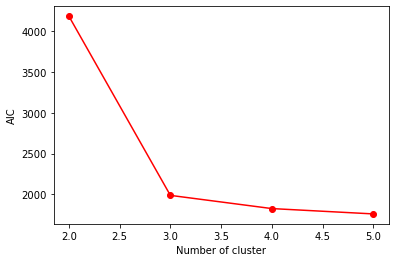

In [27]:
plt.plot(cls_n, aic_list, marker = 'o', color = 'r')
plt.xlabel("Number of cluster")
plt.ylabel("AIC")
plt.show()

군집화 결과 군집이 4개일 때 AIC가 가장 낮으므로 군집의 개수를 4로 설정하고 혼합 분포 군집을 활용한다.

In [28]:
gmm = GaussianMixture(n_components = 4, random_state = 326).fit(scaled_df)
cls = gmm.predict(scaled_df)

In [29]:
id_df['cls'] = cls

In [30]:
data = pd.merge(data, id_df[['custid', 'cls']], how = 'left')

In [31]:
id_df.cls.value_counts()

1    178
0    164
2    116
3     42
Name: cls, dtype: int64

In [32]:
import seaborn as sns

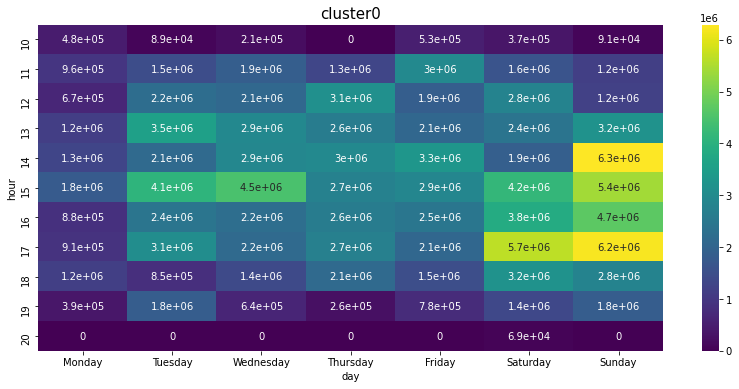

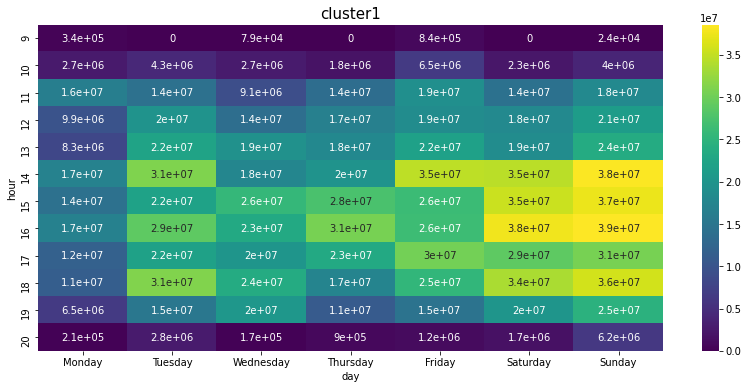

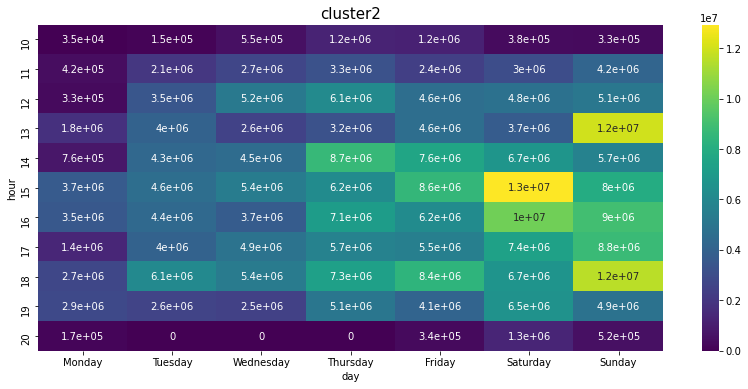

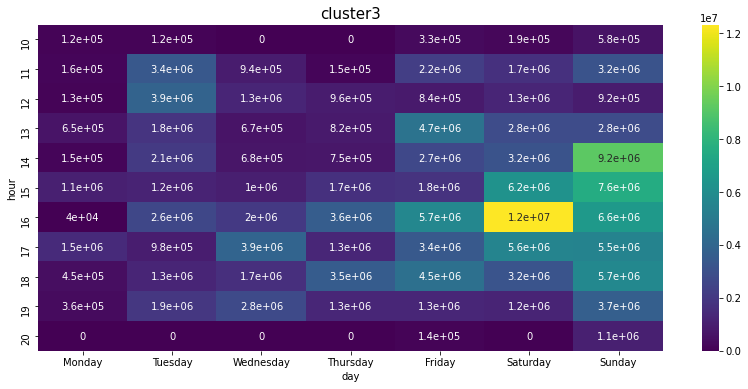

In [73]:
for n in range(0, 4) :
    globals()[f'cls_{n}'] = data[data.cls == n]
    plt.figure(figsize = (14, 6))
    plt.title(f'cluster{n}', size = 15)
    df = globals()[f'cls_{n}']
    sns.heatmap(pd.crosstab(df.hour, df.day, aggfunc = 'sum', values = df.amount).fillna(0)[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']], annot = True, cmap = 'viridis')
    plt.show()

0번 군집의 경우 일요일 오후에 구매액이 상당히 높은 것으로 나타났다. 1번 군집의 경우 주말 오후에 전반적으로 매출액이 상당히 높았다. 2번 군집의 경우는 0번과 1번에 비해 평일 구매액이 낮은 편으로 나타났다. 3번 군집은 전체적으로 구매액이 낮았으며 월요일의 구매액이 상당히 낮았다.


### 1-2. 지점별로 구매액 총 합계에 대한 시계열 분석을 진행하고 향후 7일(2001-04-30 ~ 2001-05-06)의 매출 총 합을 예측하시오.

In [34]:
df_list = []
for s in data.store.unique() :
    globals()[f'cls_{s}'] = data[data.store == s]
    print(s)
    df = globals()[f'cls_{s}']
    df = df[['datetime', 'amount']]
    df.set_index('datetime', inplace = True)
    df = df.resample('D').sum()
    df = df.asfreq('D')
    df_list.append(df)

신촌점
무역점
천호점
본점


In [44]:
s = df_list[0] # 신촌점
#m = df_list[1] # 무역점
#c = df_list[2] # 천호점
#b = df_list[3] # 본점

In [37]:
from statsmodels.tsa.api import seasonal_decompose

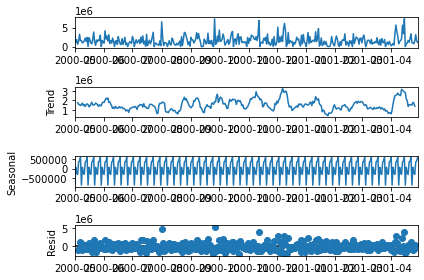

In [72]:
d = seasonal_decompose(s)
d.plot()
plt.show()

대부분 계절성과 트렌드가 보이기 때문에 SARIMA를 사용한다.

In [39]:
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller

In [40]:
y = s['amount']
y1dif = s['amount'].diff(periods = 1).dropna()

result = adfuller(y, maxlag = 15)
print("원 데이터의 ADF 값 : {}".format(result[0]))
print('원 데이터의 P-value : {}\n'.format(result[1]))

result1 = adfuller(y1dif, autolag = None)
print("1차 차분 데이터의 ADF 값 : {}".format(result1[0]))
print('1차 차분 데이터의 P-value : {}'.format(result1[1]))

원 데이터의 ADF 값 : -17.47528030284196
원 데이터의 P-value : 4.519826867686765e-30

1차 차분 데이터의 ADF 값 : -6.691684705096107
1차 차분 데이터의 P-value : 4.094478295466543e-09


파라미터 추정을 위해 자동화 함수를 사용한다.

In [41]:
from itertools import product, combinations
from tqdm import tqdm
from statsmodels.tsa.api import SARIMAX

In [65]:
y_tr_s = s.iloc[:335]
y_te_s = s.iloc[335:]

In [59]:
p, q = range(0,3), range(0,3)
d = range(0,2)
P, Q = range(0,3), range(0,3)
D = range(0,2)
m = 7
trend_pdq = list(product(p, d, q))
seasonal_pdq = [(candi[0], candi[1], candi[2], m) for candi in list(product(P, D, Q))]
## SARIMAX
AIC = []
SARIMAX_order = []
for trend_param in tqdm(trend_pdq):
    for seasonal_params in seasonal_pdq:
        try:
            result = SARIMAX(y_tr_s, trend = 'c', 
                                   order = trend_param, seasonal_order = seasonal_params, exog = None).fit()
            #print('Fit SARIMAX: trend_order={} seasonal_order={} AIC={}, BIC={}'.format(trend_param, seasonal_params, result.aic, result.bic, end='\r'))
            AIC.append(result.aic)
            SARIMAX_order.append([trend_param, seasonal_params])
        except:
            continue
## Parameter Selection
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_order[AIC.index(min(AIC))][0], SARIMAX_order[AIC.index(min(AIC))][1]))

  0%|          | 0/18 [00:00<?, ?it/s]/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 61%|██████    | 11/18 [01:04<00:44,  6.37s/it]/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
100%|██████████| 18/18 [02:17<00:00,  7.64s/it]

The smallest AIC is 10155.763699023533 for model SARIMAX(1, 0, 0)x(0, 1, 1, 7)


7일 주기로 변화하기 때문에 계절 차수를 7로 설정한다.

In [61]:
model = SARIMAX(y_tr_s, trend = 'c', order = SARIMAX_order[AIC.index(min(AIC))][0], 
                                seasonal_order = SARIMAX_order[AIC.index(min(AIC))][1], exog=None).fit()
display(model.summary())
pred = model.get_forecast(len(y_te_s)).predicted_mean

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                              amount   No. Observations:                  335
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 7)   Log Likelihood               -5073.882
Date:                             Fri, 04 Jun 2021   AIC                          10155.764
Time:                                     18:37:19   BIC                          10170.936
Sample:                                 05-01-2000   HQIC                         10161.817
                                      - 03-31-2001                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.435e+04   1.73e+04     -0.831      0.406   -4.82e+04    1.95e+04
ar.L1          0.0641      0.105      0.612      0.541      -0.141       0.269
ma.S.L7       -0.9056      0.074    -12.291      0.000      -1.050      -0.761
sigma2      2.507e+12      0.001   3.05e+15      0.000    2.51e+12    2.51e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               293.25
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                             1.46
Prob(H) (two-sided):                  0.58   Kurtosis:                         6.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.16e+38. Standard errors may be unstable.
"""

In [47]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [66]:
print(f'SARIMA 모형의 RMSE = {np.sqrt(mean_squared_error(y_te_s, pred))}')

SARIMA 모형의 RMSE = 1794557.0658648186


In [69]:
y_te_s['pred'] = pred.astype('int')

<ipython-input-69-b53ccbe43ed2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_te_s['pred'] = pred.astype('int')


In [71]:
y_te_s

,amount,pred
datetime,,
2001-04-01,206433,1691454
2001-04-02,440833,344896
2001-04-03,808807,1280785
2001-04-04,353491,1078780
2001-04-05,3353807,1071977
2001-04-06,5669497,1506735
2001-04-07,3977465,1555596
2001-04-08,2734799,1735283
2001-04-09,723564,333353


## 2. 자전거 이용량

### 2-1. 데이터를 적절하게 전처리하고 무결성, 적합성을 판단하시오.

In [96]:
data = pd.read_csv('/Users/kisehyun/competition/데이콘_서울시 따릉이 자전거 이용량 예측/train.csv')

In [97]:
data.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [99]:
data = data.iloc[:, 1:]
data.dropna(inplace = True)

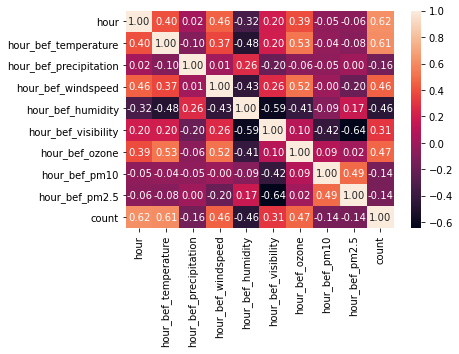

In [100]:
sns.heatmap(data.corr(), annot = True, fmt = '.2f')
plt.show()

In [104]:
data.describe()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000
mean,11.905120,16.866039,0.030120,2.489834,51.740964,1413.655120,0.039091,57.481175,30.382530,110.804970
std,6.746907,5.196544,0.170983,1.382797,20.167066,577.258705,0.019430,31.221062,14.740807,82.900629
min,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,6.000000,13.000000,0.000000,1.400000,36.000000,899.000000,0.026000,36.000000,20.000000,37.000000
50%,12.000000,16.800000,0.000000,2.400000,50.000000,1581.500000,0.038500,52.000000,26.000000,100.500000
75%,18.000000,20.200000,0.000000,3.400000,68.000000,1993.250000,0.052000,70.000000,37.000000,153.000000
max,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


hour_bef_precipitation은 0 값이 많으므로 분석에서 제외한다.

In [106]:
data.drop('hour_bef_precipitation', axis = 1, inplace = True)

In [107]:
data.skew()

hour                   -0.011680
hour_bef_temperature    0.175182
hour_bef_windspeed      0.549710
hour_bef_humidity       0.158640
hour_bef_visibility    -0.504122
hour_bef_ozone          0.391180
hour_bef_pm10           2.355492
hour_bef_pm2.5          1.354742
count                   0.849928
dtype: float64

In [108]:
np.log1p(data).skew()

hour                   -1.351842
hour_bef_temperature   -0.690285
hour_bef_windspeed     -0.388925
hour_bef_humidity      -0.761256
hour_bef_visibility    -1.454772
hour_bef_ozone          0.335189
hour_bef_pm10           0.221112
hour_bef_pm2.5          0.266342
count                  -0.896900
dtype: float64

hour_bef_pm10, hour_bef_pm2.5은 왜도가 높으므로 로그 변환을 실시한다.

In [110]:
data[['hour_bef_pm10', 'hour_bef_pm2.5']] = np.log1p(data[['hour_bef_pm10', 'hour_bef_pm2.5']])

### 2-2. 회귀분석을 실시하고 회귀식을 추정하고 해석하시오.

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS, add_constant

In [167]:
X = data.iloc[:, :-1]
X = add_constant(X)
Y = data['count']

In [168]:
model = OLS(Y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     225.5
Date:                Fri, 04 Jun 2021   Prob (F-statistic):          1.22e-240
Time:                        19:45:12   Log-Likelihood:                -7178.1
No. Observations:                1328   AIC:                         1.437e+04
Df Residuals:                    1319   BIC:                         1.442e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -8.1607     30.500     -0.268      0.789     -67.995      51.673
hour                     4.6950      0.261     17.995      0.000       4.183       5.207
hour_bef_temperature     5.2965      0.374     14.179      0.000       4.564       6.029
hour_bef_windspeed       4.5298      1.410      3.213      0.001       1.764       7.295
hour_bef_humidity       -0.3539      0.122     -2.896      0.004      -0.594      -0.114
hour_bef_visibility      0.0101      0.005      2.159      0.031       0.001       0.019
hour_bef_ozone         318.4264    101.344      3.142      0.002     119.613     517.240
hour_bef_pm10          -19.2094      4.526     -4.244      0.000     -28.089     -10.330
hour_bef_pm2.5           8.9863      5.347      1.680      0.093      -1.504      19.477
==============================================================================
Omnibus:                      167.249   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.070
Skew:                           0.855   Prob(JB):                     6.16e-59
Kurtosis:                       4.385   Cond. No.                     1.04e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [160]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'const')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,hour,1.408125
1,hour_bef_temperature,1.712347
2,hour_bef_windspeed,1.726860
3,hour_bef_humidity,2.760350
4,hour_bef_visibility,3.289129
5,hour_bef_ozone,1.762024
6,hour_bef_pm10,2.006717
7,hour_bef_pm2.5,2.429834


In [161]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     225.5
Date:                Fri, 04 Jun 2021   Prob (F-statistic):          1.22e-240
Time:                        19:44:37   Log-Likelihood:                -7178.1
No. Observations:                1328   AIC:                         1.437e+04
Df Residuals:                    1319   BIC:                         1.442e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -8.1607     30.500     -0.268      0.789     -67.995      51.673
hour                     4.6950      0.261     17.995      0.000       4.183       5.207
hour_bef_temperature     5.2965      0.374     14.179      0.000       4.564       6.029
hour_bef_windspeed       4.5298      1.410      3.213      0.001       1.764       7.295
hour_bef_humidity       -0.3539      0.122     -2.896      0.004      -0.594      -0.114
hour_bef_visibility      0.0101      0.005      2.159      0.031       0.001       0.019
hour_bef_ozone         318.4264    101.344      3.142      0.002     119.613     517.240
hour_bef_pm10          -19.2094      4.526     -4.244      0.000     -28.089     -10.330
hour_bef_pm2.5           8.9863      5.347      1.680      0.093      -1.504      19.477
==============================================================================
Omnibus:                      167.249   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.070
Skew:                           0.855   Prob(JB):                     6.16e-59
Kurtosis:                       4.385   Cond. No.                     1.04e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

모형의 결정계수는 0.578로 해당 모형으로 데이터의 57.8%를 설명할 수 있음을 의미한다. 또한 모형의 F-통계량은 225.5이고 이 때 유의확률은 0으로 유의수준 0.05 보다 낮아 모형이 통계적으로 유의하다고 할 수 있다. 상수항을 제외한 모든 회귀계수가 유의수준 0.1하에서 통계적으로 유의한 것을 알 수 있다. 또한 잔차의 자기상관을 확인할 수 있는 더빈 왓슨 통계량도 2에 근사하여 잔차의 자기상관성이 없음을 확인하였다.

이 때 추정된 회귀식은 

count = -8.1607 + 4.695 * hour + 5.2965 * hour_bef_temperature + 4.5298 * hour_bef_windspeed - 0.3539 * hour_bef_humidity + 0.0101 * hour_bef_visibility + 318.4264 * hour_bef_ozone - 19.2094 * hour_bef_pm10 + 8.9863 * hour_bef_pm2.5이다.

시간이 한 단위 증가할 때 대여 수는 약 5대 증가하는 것을 의미한다.

### 2-3. 잔차 진단을 실시하시오.

In [162]:
fitted = result.predict(X)
resid = result.resid

/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


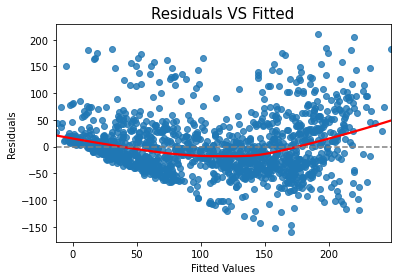

In [163]:
sns.regplot(fitted, resid, lowess = True, line_kws = {'color' : 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color = 'gray')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
plt.title('Residuals VS Fitted', size = 15)
plt.show()

In [164]:
from scipy.stats import zscore, probplot
from statsmodels.stats.outliers_influence import OLSInfluence
# OLSInfluence로 호출하는 방식과 result.get_influence()로 호출하는 방식 동일

In [165]:
sr = zscore(resid) # result.get_influence().resid_studentized_internal 과 동일 / 표준화 잔차
(x, y), _ = probplot(sr)

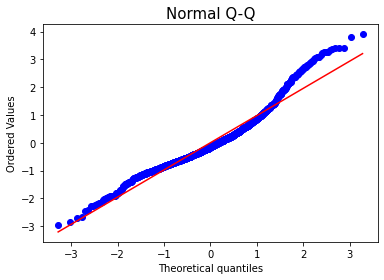

In [141]:
probplot(result.get_influence().resid_studentized_internal, plot = plt)
plt.title('Normal Q-Q', size = 15)
plt.show()

잔차가 정규분포를 따름을 알 수 있다.

/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


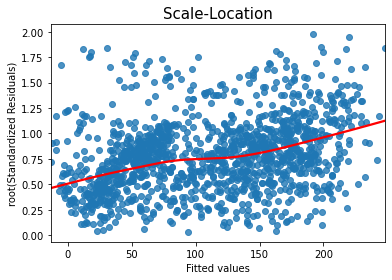

In [142]:
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess = True, line_kws = {'color': 'red'})
plt.title('Scale-Location', size = 15)
plt.ylabel('root(Standardized Residuals)')
plt.xlabel('Fitted values')
plt.show()

In [147]:
cd, _ = OLSInfluence(result).cooks_distance
cd = cd.sort_values()[::-1][:30]

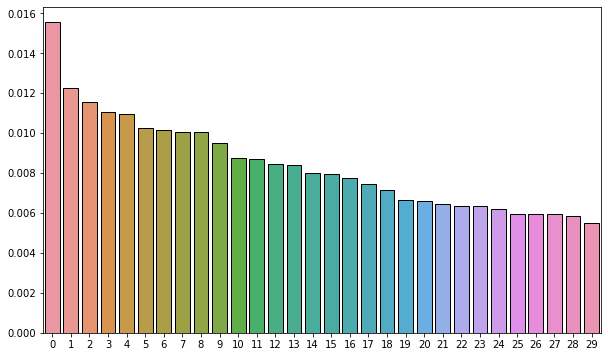

In [149]:
plt.figure(figsize = (10, 6))
sns.barplot(x = np.arange(cd.shape[0]), y = cd, edgecolor = (0, 0, 0))
plt.show()

1 이상일 경우 영향치로 간주하지만 해당 데이터에는 존재하지 않는다.

/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


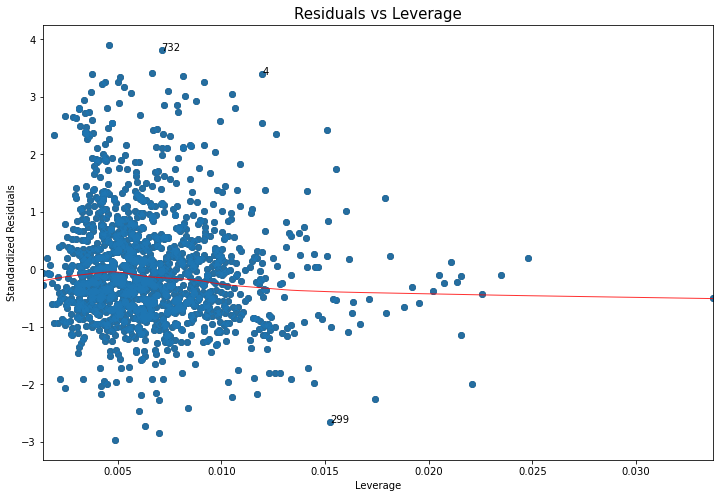

In [150]:
plt.figure(figsize = (12, 8))
plt.scatter(result.get_influence().hat_matrix_diag, sr, color = 'black', alpha = .7)
sns.regplot(result.get_influence().hat_matrix_diag, sr, lowess = True,
              line_kws = {'color': 'red', 'lw': 1, 'alpha': 0.8});
leverage_top_3 = np.flip(np.argsort(result.get_influence().cooks_distance[0]), 0)[:3]
for i in leverage_top_3:
    plt.annotate(i, xy = (result.get_influence().hat_matrix_diag[i], sr[i]));
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.title('Residuals vs Leverage', size = 15)
plt.show()

### 2-4. 정확도를 평가하시오.
- 실제 값 >= 예측값인 경우 확률은 (1 - 예측값/실제값)
- 예측 값 > 실제값인 경우 확률은 (1 - 실제값/예측값)

threshold는 0.55로 해서 정확도를 평가하시오.

In [195]:
mat = pd.DataFrame({'actual' : list(Y), 'prediction' : list(fitted)}, index = np.arange(Y.shape[0]))
mat.head()

,actual,prediction
0,49.0,110.006959
1,159.0,121.970234
2,26.0,53.010620
3,57.0,112.421312
4,431.0,248.456493


In [196]:
TF_list = []
for n in range(mat.shape[0]) :
    if mat.actual[n] > mat.prediction[n] :
        prob = 1 - (mat.prediction[n] / mat.actual[n])
        TF_list.append(prob)
    else :
        prob = 1 - (mat.actual[n] / mat.prediction[n])
        TF_list.append(prob)

In [204]:
label = [1 if x >= .55 else 0 for x in TF_list]

In [206]:
pd.Series(label).value_counts()

0    1045
1     283
dtype: int64

## 3. 텍스트 마이닝

### 3-1. classification과 관련된 다양한 평가 지표들을 설명하고 스팸 분류 문제에 맞는 평가지표를 선택하시오.

분류 문제에서 평가지표는 정확도, 오분류율, 특이도, 민감도, 정확도, 재현율, F1-score, auc, roc_aoc_score 등이 있다. 

정확도는 직관적으로 모델의 예측 성능을 나타내는 평가지표이다. 이진 분류의 경우 데이터의 구성에 따라 모델의 성능을 왜곡할 수 있기 떄문에 정확도 수치 하나만 가지고 성능을 평가하지 않는다. 정밀도와 재현율은 Positive 데이터의 예측 성능에 좀 더 초점을 맞춘 평가지표이다. 정밀도는 참으로 예측한 대상 중에 예측과 실제 값이 참으로 일치한 데이터의 비율을 의미한다. 참인 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 양성 예측도라고도 한다. 재현율은 실제 값이 참인 대상 중에 예측과 실제 값이 참으로 일치한 데이터의 비율을 뜻한다. 재현율이 중요 지표인 경우는 실제 참인 데이터를 거짓으로 잘못판단하게 되면 업무상 큰 영향이 발생하는 경우이다. 예를 들어 암 진단과 같은 경우이다. 스팸메일 여부를 판단하는 경우 스팸인 메일을 스팸이 아니라고 하더라도 큰 문제가 없지만 스팸이 아닌 메일을 스팸이라고 하는 경우는 문제가 발생할 소지가 있다. 따라서 해당 문제에서는 정밀도를 우선으로 평가한다. F1score는 정밀도와 재현율을 결합한 지표로 둘 중 한쪽으로 치우치지 않은 경우 상대적으로 높은 값을 가진다. roc는 FPR이 변할 때 TPR이 어떻게 변하는지 나타내는 지표이다. auc는 roc 곡선 밑의 면적을 구한 것으로서 일반적으로 1에 가까울수록 좋은 수치이다.

결론 : 정밀도로 평가한다.

### 3-2. 선택한 평가지표를 기준으로 스팸 여부 분류 모델링을 수행하고 평가한 후 최종 예측 파일을 csv로 만드시오.

In [421]:
train = pd.read_csv('SMS_train.csv', encoding = 'CP949')
test = pd.read_csv('SMS_test.csv', encoding = 'CP949')

In [422]:
train.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [423]:
test.head()

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose 500 - 75,000. Homeowners ...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam


In [424]:
train.Label.value_counts()

Non-Spam    835
Spam        122
Name: Label, dtype: int64

In [425]:
train['Label'] = [1 if x == 'Spam' else 0 for x in train.Label]

In [426]:
import re

In [427]:
train['Message_body'] = train['Message_body'].str.lower()
test['Message_body'] = test['Message_body'].str.lower()

In [428]:
train['Message_body'] = [re.sub(r'[^a-zA-Z]', ' ', x) for x in train['Message_body']]
test['Message_body'] = [re.sub(r'[^a-zA-Z]', ' ', x) for x in test['Message_body']]

In [429]:
import nltk
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [430]:
X_train, X_test, y_train, y_test = train_test_split(train.Message_body, train.Label, test_size = .3, stratify = train.Label, random_state = 604)

In [431]:
tfidf = TfidfVectorizer(max_features = 500, ngram_range = (1,3), stop_words = 'english')

In [432]:
X_train = tfidf.fit_transform(X_train).todense()

In [433]:
X_test = tfidf.transform(X_test).todense()

In [434]:
from sklearn.naive_bayes import GaussianNB

In [435]:
model = GaussianNB()

In [436]:
model.fit(X_train, y_train)

GaussianNB()

In [437]:
pred = model.predict(X_test)

In [438]:
from sklearn.metrics import precision_score

In [439]:
precision_score(y_test, pred, pos_label = 1)

0.39080459770114945

In [440]:
target = tfidf.transform(test.Message_body).todense()

In [441]:
pred_label = model.predict(target)

In [442]:
test['prediction'] = pred_label

In [443]:
test['Label'] = [1 if x == 'Spam' else 0 for x in test.Label]

In [444]:
precision_score(test.Label, test.prediction)

0.8333333333333334

In [445]:
test.Label.value_counts()

1    76
0    49
Name: Label, dtype: int64

In [446]:
test.prediction.value_counts()

1    72
0    53
Name: prediction, dtype: int64